In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

# pandas most usable for data analysis it is faster and easier package for data reading and writing 
# pandas ae flexible to use

# can read csv files and write csv files 
# with the help of we can extract or export the data
# we will use read_csv to to read the csv and write_csv is used to write the data into csv file

df=pd.read_csv("/content/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df['Gender'].value_counts()



Male      5457
Female    4543
Name: Gender, dtype: int64

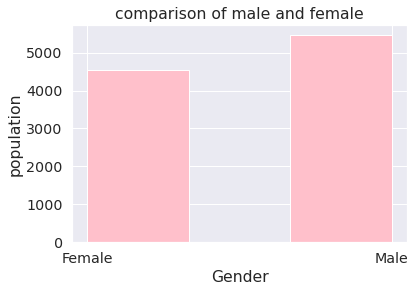

In [ ]:
plt.hist(x = df.Gender, bins = 3, color = 'pink')
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()


In [ ]:
df['Age'].value_counts()


37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

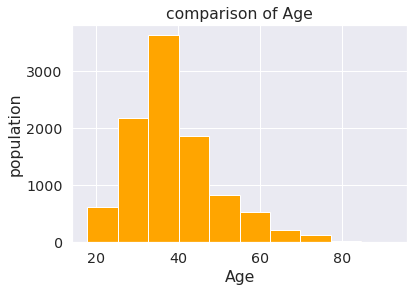

In [ ]:
# comparison of age in the dataset

plt.hist(x = df.Age, bins = 10, color = 'orange')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

In [ ]:
df['Geography'].value_counts()


France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

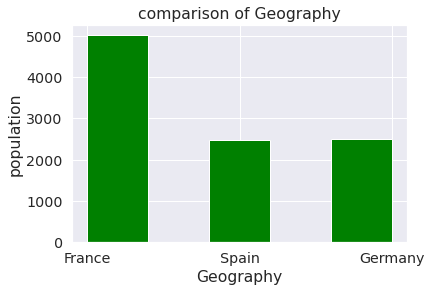

In [ ]:
# comparison of geography

plt.hist(x = df.Geography, bins = 5, color = 'green')
plt.title('comparison of Geography')
plt.xlabel('Geography')
plt.ylabel('population')
plt.show()

In [ ]:
df['HasCrCard'].value_counts()


1    7055
0    2945
Name: HasCrCard, dtype: int64

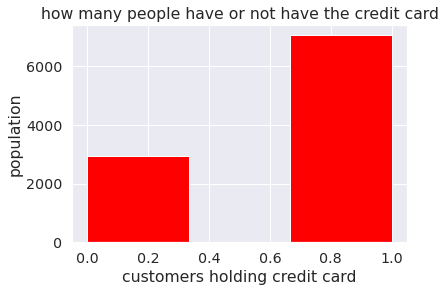

In [ ]:
# comparision of how many customers hold the credit card

plt.hist(x = df.HasCrCard, bins = 3, color = 'red')
plt.title('how many people have or not have the credit card')
plt.xlabel('customers holding credit card')
plt.ylabel('population')
plt.show()

In [ ]:
df['IsActiveMember'].value_counts()


1    5151
0    4849
Name: IsActiveMember, dtype: int64

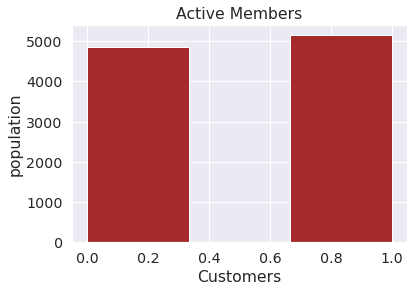

In [ ]:
# How many active member does the bank have ?

plt.hist(x = df.IsActiveMember, bins = 3, color = 'brown')
plt.title('Active Members')
plt.xlabel('Customers')
plt.ylabel('population')
plt.show()

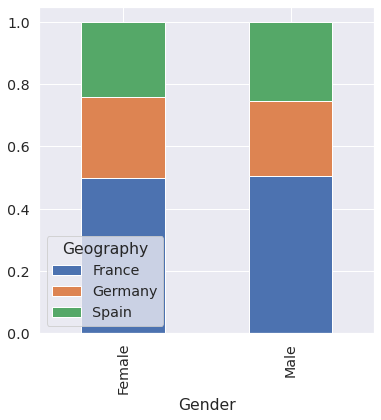

In [ ]:
# comparison between Geography and Gender

Gender = pd.crosstab(df['Gender'],df['Geography'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6))

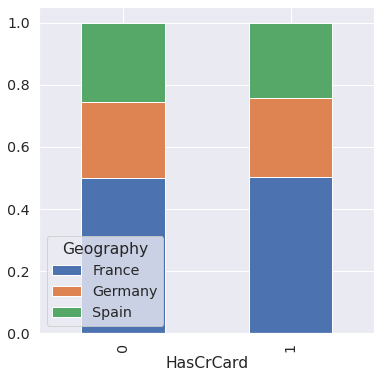

In [ ]:
# comparison between geography and card holders

HasCrCard = pd.crosstab(df['HasCrCard'], df['Geography'])
HasCrCard.div(HasCrCard.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                            stacked = True,figsize = (6, 6))


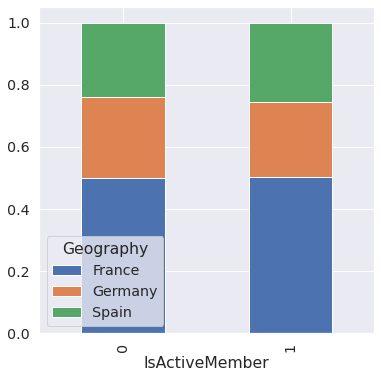

In [ ]:
# comparison of active member in differnt geographies

IsActiveMember = pd.crosstab(df['IsActiveMember'], df['Geography'])
IsActiveMember.div(IsActiveMember.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                             stacked = True, figsize= (6, 6))


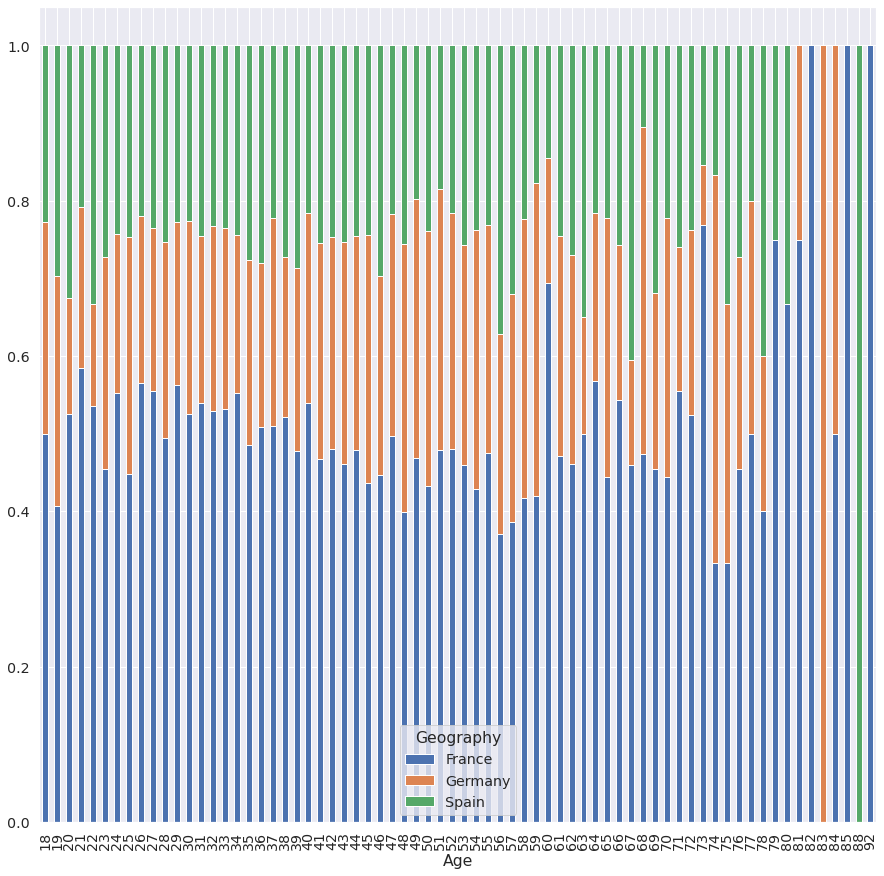

In [ ]:
# comparing ages in different geographies

Age = pd.crosstab(df['Age'], df['Geography'])
Age.div(Age.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                           stacked = True, figsize = (15,15))

In [ ]:
# calculating total balance in france, germany and spain

total_france = df.Balance[df.Geography == 'France'].sum()
total_germany = df.Balance[df.Geography == 'Germany'].sum()
total_spain = df.Balance[df.Geography == 'Spain'].sum()

print("Total Balance in France :",total_france)
print("Total Balance in Germany :",total_germany)
print("Total Balance in Spain :",total_spain)

Total Balance in France : 311332479.49
Total Balance in Germany : 300402861.38
Total Balance in Spain : 153123552.01


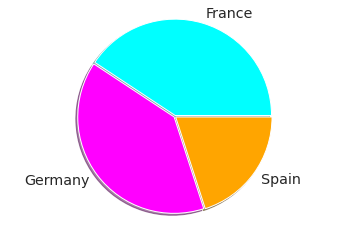

In [ ]:
# plotting a pie chart

labels = 'France', 'Germany', 'Spain'
colors = ['cyan', 'magenta', 'orange']
sizes =  [311, 300, 153]
explode = [ 0.01, 0.01, 0.01]

plt.pie(sizes, colors = colors, labels = labels, explode = explode, shadow = True)

plt.axis('equal')
plt.show()

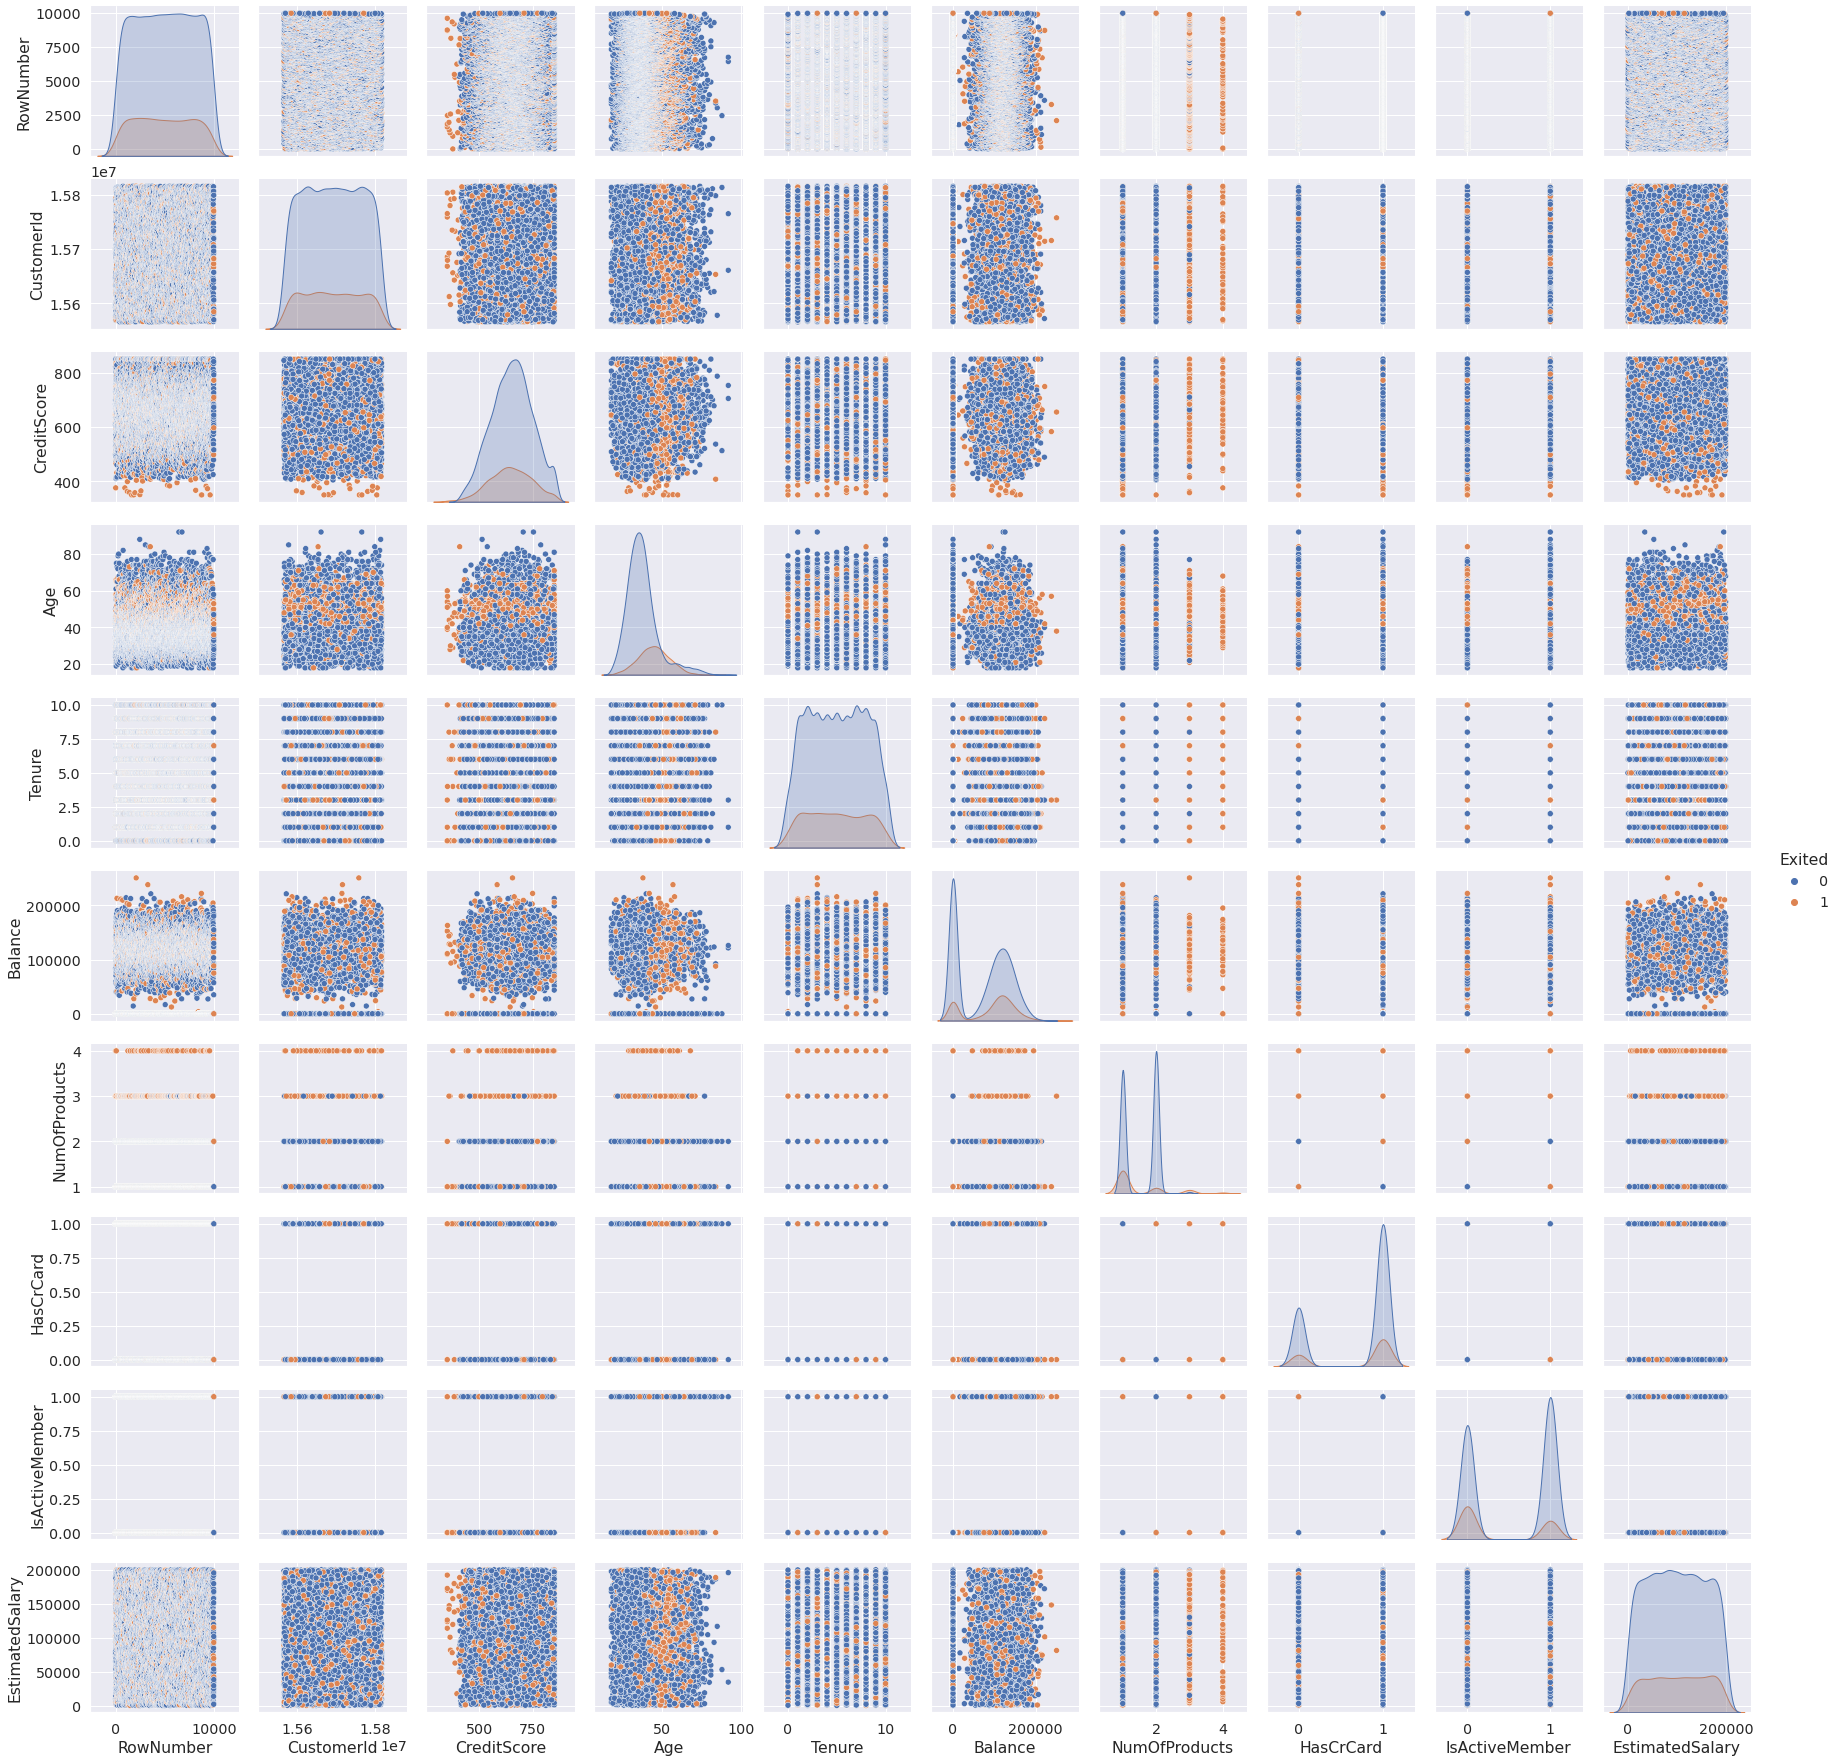

In [ ]:
sns.pairplot(data=df, hue='Exited')


In [ ]:
#Statistical analysis

df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#Missing Values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

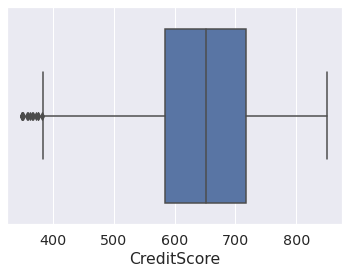

In [ ]:
sns.boxplot(data = df, x = 'CreditScore')


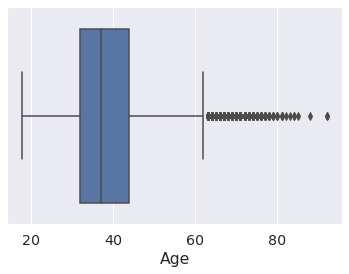

In [ ]:
sns.boxplot(data = df, x = 'Age')


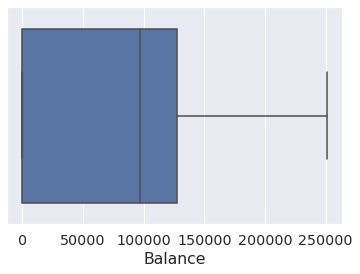

In [ ]:
sns.boxplot(data = df, x = 'Balance')


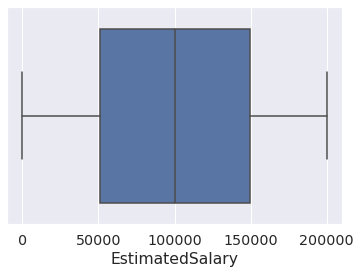

In [ ]:
sns.boxplot(data = df, x = 'EstimatedSalary')


In [ ]:
for i in df:
    if df[i].dtype=='int64' or df[i].dtypes=='float64':
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        df[i]=np.where(df[i] >upper, upper, df[i])
        df[i]=np.where(df[i] <lower, lower, df[i])

In [ ]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0
mean,5000.50000,1.569094e+07,650.561300,38.660800,5.012800,76485.889288,1.527200,0.70550,0.515100,100090.239881,0.0
std,2886.89568,7.193619e+04,96.558702,9.746704,2.892174,62397.405202,0.570081,0.45584,0.499797,57510.492818,0.0
min,1.00000,1.556570e+07,383.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.0
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.0
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.0
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.0
max,10000.00000,1.581569e+07,850.000000,62.000000,10.000000,250898.090000,3.500000,1.00000,1.000000,199992.480000,0.0


In [ ]:
# Removing the unnecassary features from the dataset

td = df.drop(['CustomerId', 'Surname', 'RowNumber'], axis = 1)

print(td.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [ ]:
df.shape


(10000, 14)

In [ ]:
# splitting the dataset into x(independent variables) and y(dependent variables)

x = df.iloc[:,0:10]
y = df.iloc[:,10]

print(x.shape)
print(y.shape)

print(x.columns)

(10000, 10)
(10000,)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts'],
      dtype='object')


In [ ]:
# Encoding Categorical variables into numerical variables
# One Hot Encoding

x = pd.get_dummies(x)

x.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,Surname_Abazu,Surname_Abbie,Surname_Abbott,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
# splitting the data into training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7500, 2944)
(7500,)
(2500, 2944)
(2500,)


In [ ]:
# Feature Scaling 
# Only on Independent Variable to convert them into values ranging from -1 to +1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
0,-0.702176,-1.343330,-0.736828,0.042283,0.008860,0.673160,2.583231,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,1.760216,-0.574682,1.087261,-1.087261
1,-1.485722,1.558330,1.025257,-0.674496,0.008860,-1.207724,0.822578,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,1.087261,-1.087261
2,-0.524522,-0.655156,0.808861,-0.469702,1.393293,-0.356937,0.822578,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,1.087261,-1.087261
3,-1.167396,1.200594,0.396677,-0.060114,0.008860,-0.009356,-0.938076,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,-1.015588,-0.568112,1.740094,-0.919743,0.919743
4,-1.451159,0.778798,-0.468908,1.373444,0.701077,-1.207724,0.822578,-0.016332,0.0,-0.0231,...,-0.011548,0.0,-0.011548,-0.011548,-0.016332,0.984651,-0.568112,-0.574682,-0.919743,0.919743
